In [1]:
%run preamble.ipynb


## The preamble handles a few imports.
## It also loads common functions and dicts: 

## Bosch challenge specific:
* **getMCC**(tp,tn,fp,fn)

## ML/Analytics functions:
* **compare_train_test**(clf, ds_train, label_train, ds_test, label_test, mva='MVA', bins=50, use_vote=None, log=False)
* **plot_classifier_output**( pred_train, pred_test, y_train, y_test, multipagepdf=None, bins = None, normalised = True )
* **plot_correlations**(data,label='', \*\*kwds)
* **optimisePars**(mva, points, data , classes, fraction=0.7, score = 'log_loss', cvs=5)

---

## Various
* **showUniques**(df)
* **ensure_dir**(directory)
* **printBumper**(text, c='=', n=-1)
* **intersec**(d1, d2)
* **union**(d1, d2)

---

## Color dictionaries:
* **Tableau10**
* **Tableau10_Light**
* **Tableau10_Medium**
* **Tableau_20**
* **ColorBlind10**


In [2]:
import matplotlib.font_manager
import scipy.stats as st
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

In [3]:
best_features = pd.read_csv("files/most_gaussian_features.csv")

In [4]:
train = pd.read_csv("files/train_numeric.csv",usecols=["Id","Response"]+list(best_features.columns.values))

In [5]:
# define two outlier detection tools to be compared
svm = OneClassSVM(nu =0.006,#=0.95 * outliers_fraction + 0.05,
                    kernel="rbf", gamma=0.1, verbose=True,
                     cache_size = 4000)

In [6]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

In [7]:
len(train)

1183747

In [17]:
len(train.dropna(how="all",axis=1))

1183747

In [20]:
clf = Pipeline([("imputer", Imputer(strategy="mean",verbose=1)),
        ("svm", svm)])

In [19]:
x_train, x_val, y_train, y_val =  train_test_split(train, train.Response,train_size=0.7
                                  , random_state=666, stratify=train.Response)

In [21]:
droptrain=["Id","Response"]

In [23]:
s = time.time()
clf.fit(x_train.drop(droptrain,axis=1))
print((time.time()-s)/60.)

[LibSVM]175.1854226986567


In [24]:
joblib.dump(clf, "files/model_OCsvm_on_07.pkl", compress=3)

['files/model_OCsvm_on_07.pkl']

In [25]:
y_pred = clf.decision_function(x_train.drop(droptrain,axis=1)).ravel()

In [32]:
len(y_pred)==len(y_train)

True

In [33]:
df = pd.DataFrame({"pred_func": y_pred, "true_class": y_train})

In [49]:
df.to_csv("files/oneClassSVM_results.csv")

C:\Users\maxxo_000\Anaconda3\envs\jupnote\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


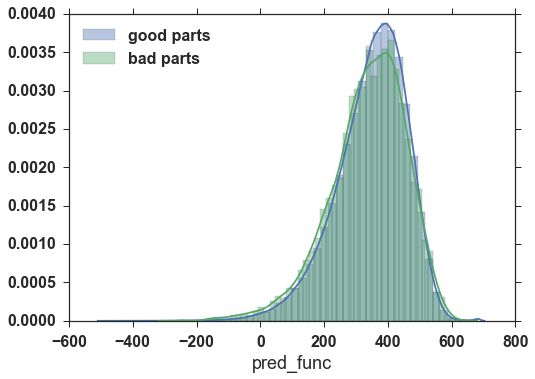

In [35]:
a = sns.distplot(df.pred_func[df.true_class==0],norm_hist=True,
                label="good parts")
a = sns.distplot(df.pred_func[df.true_class==1],norm_hist=True
                , label="bad parts")
a.legend(loc=0)

In [36]:
a.figure.savefig("oneClassSVM_onGaus.png")